# **0. Kết nối Drive**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive'

Mounted at /content/gdrive
/content/gdrive/MyDrive


# **1. Mô tả các thuộc tính, kiểu dữ liệu và vẽ các biểu đồ phân bố dữ liệu.**

Thông tin dữ liệu xu hướng mua sắm:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3

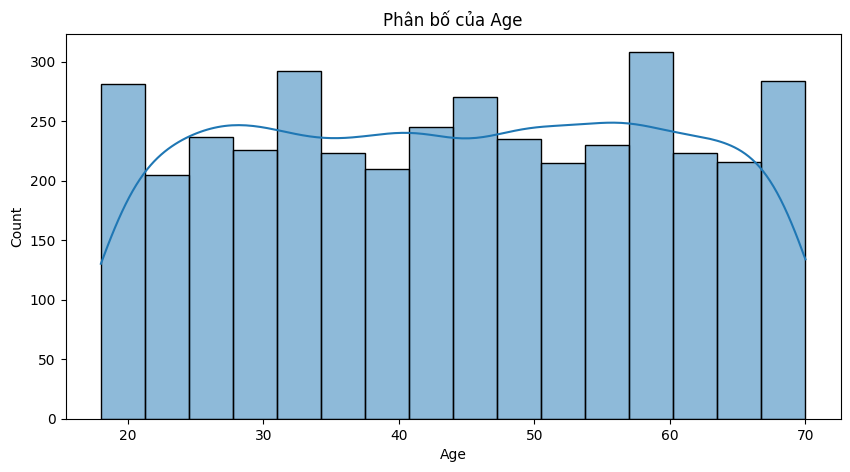

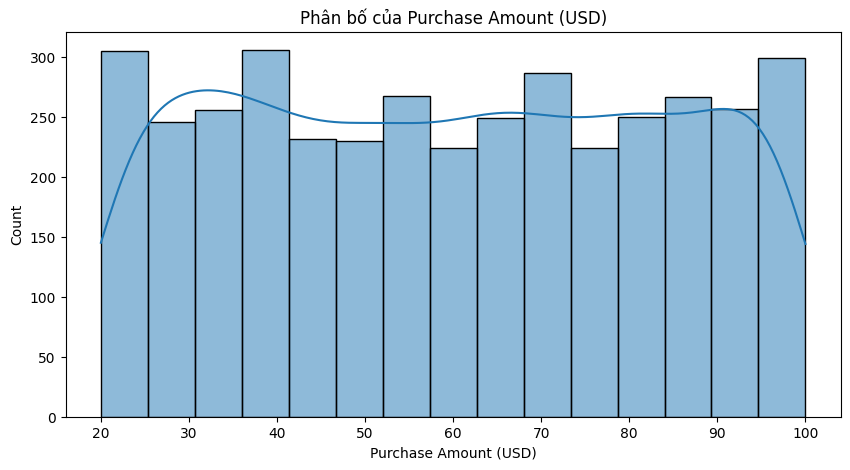

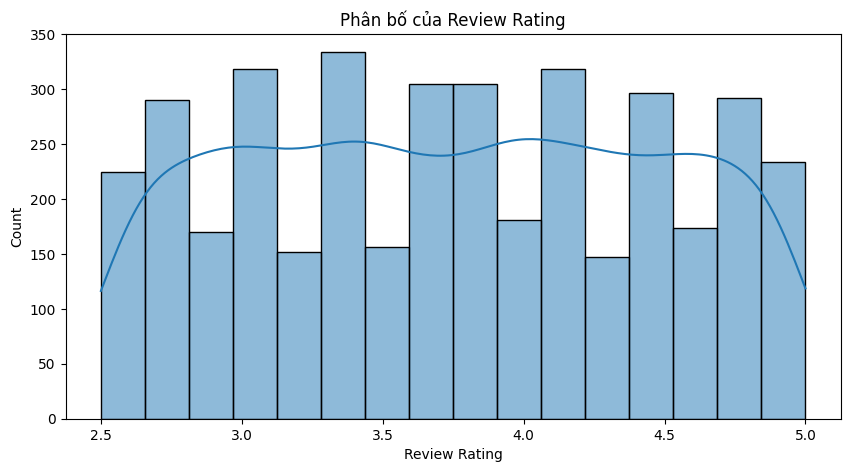

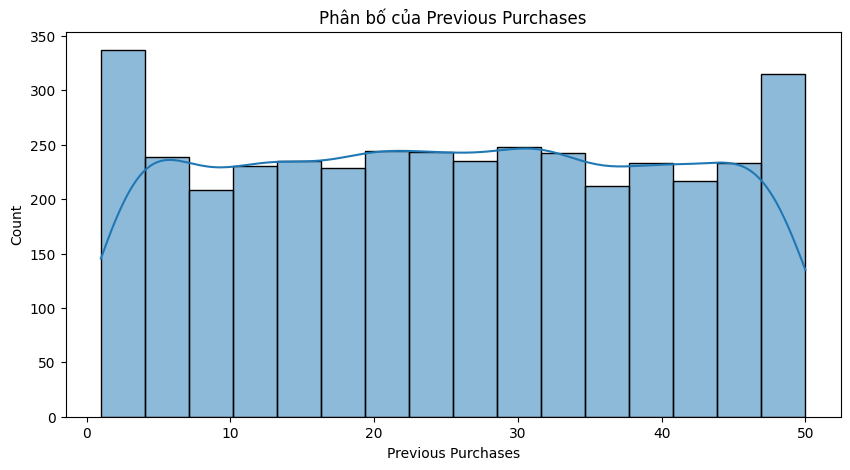

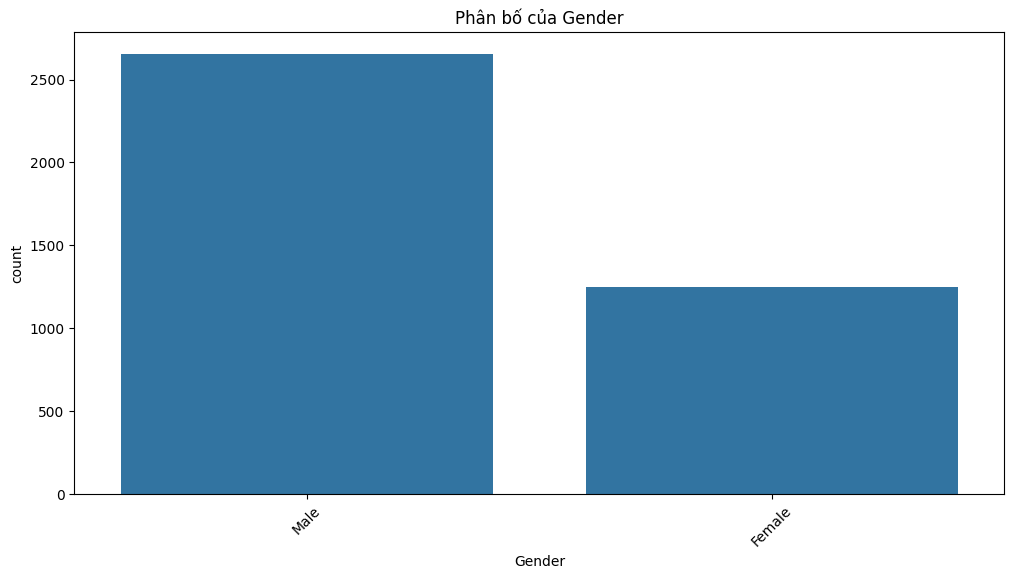

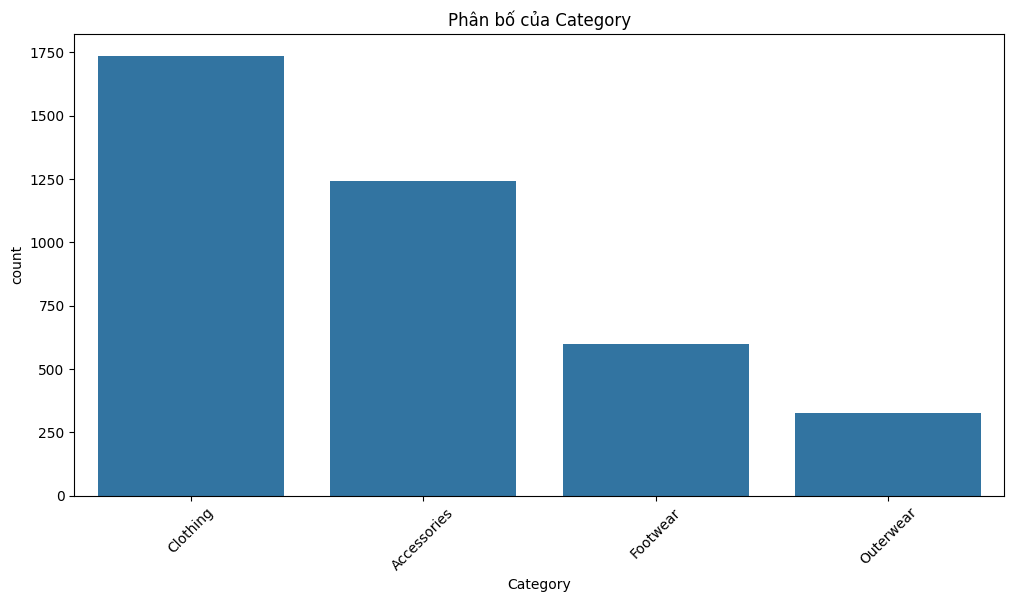

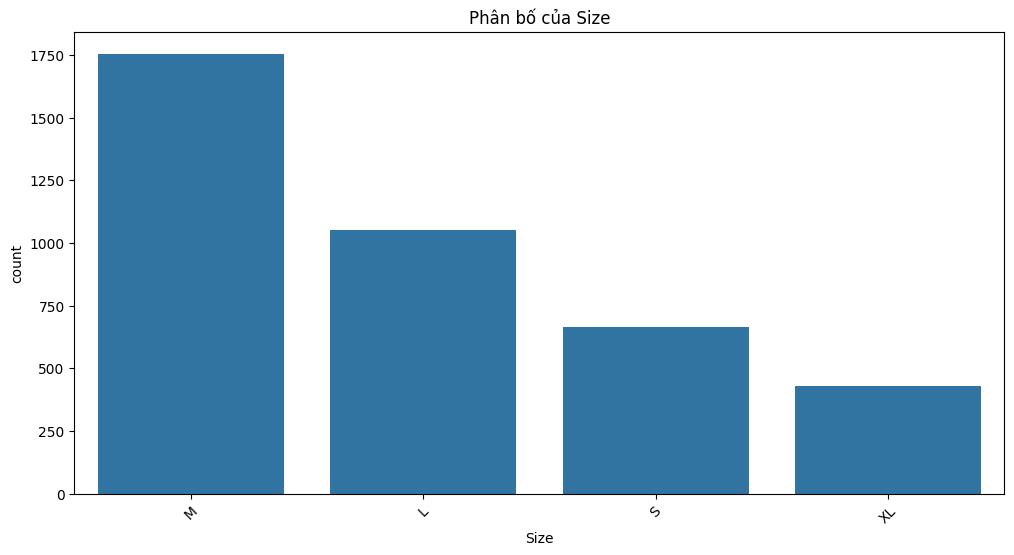

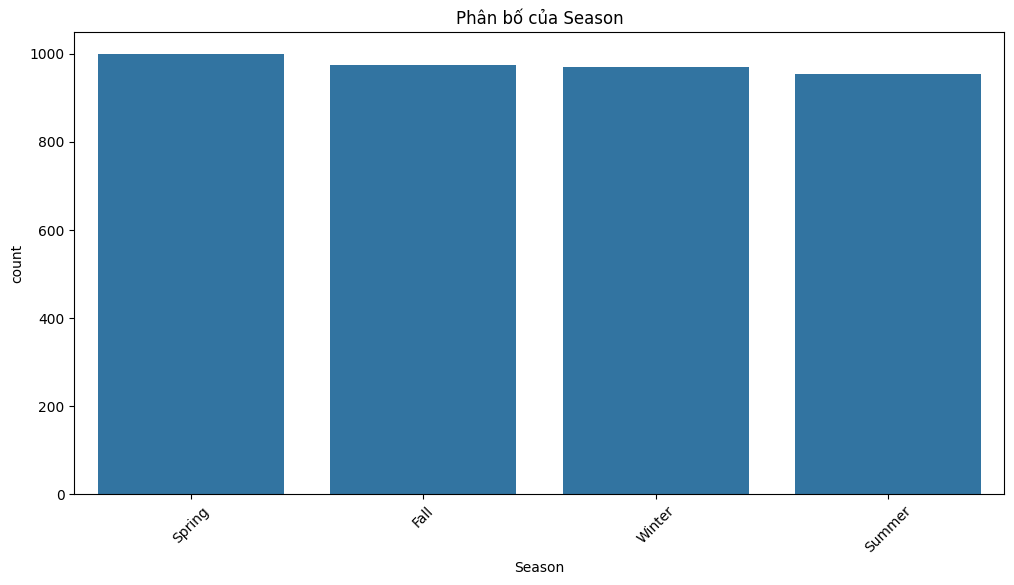

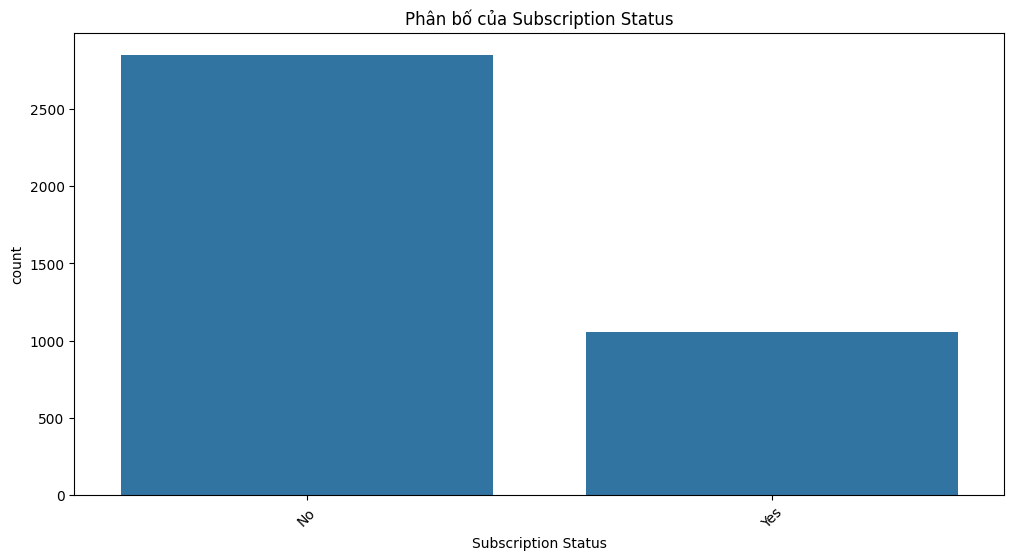

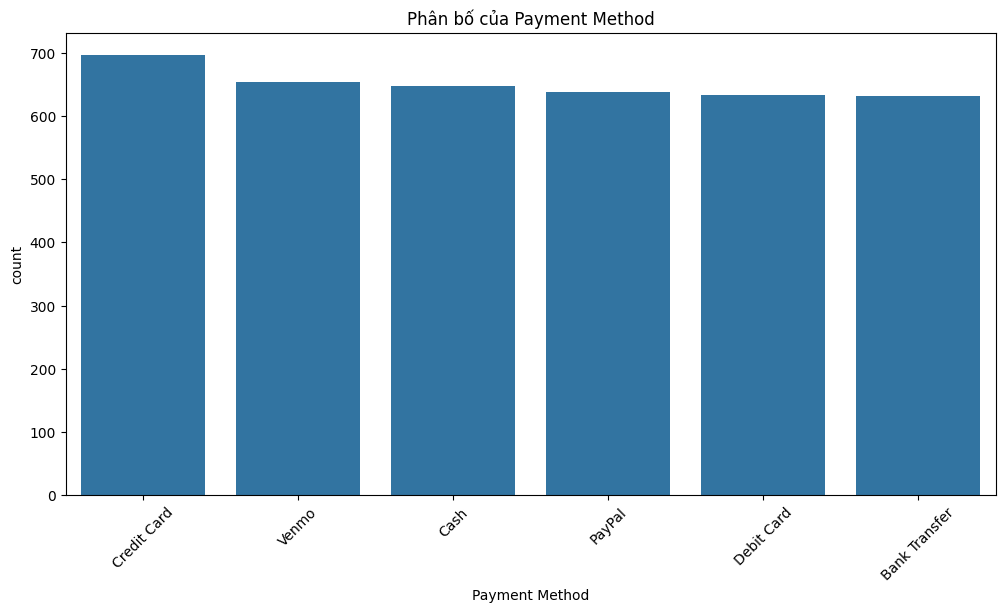

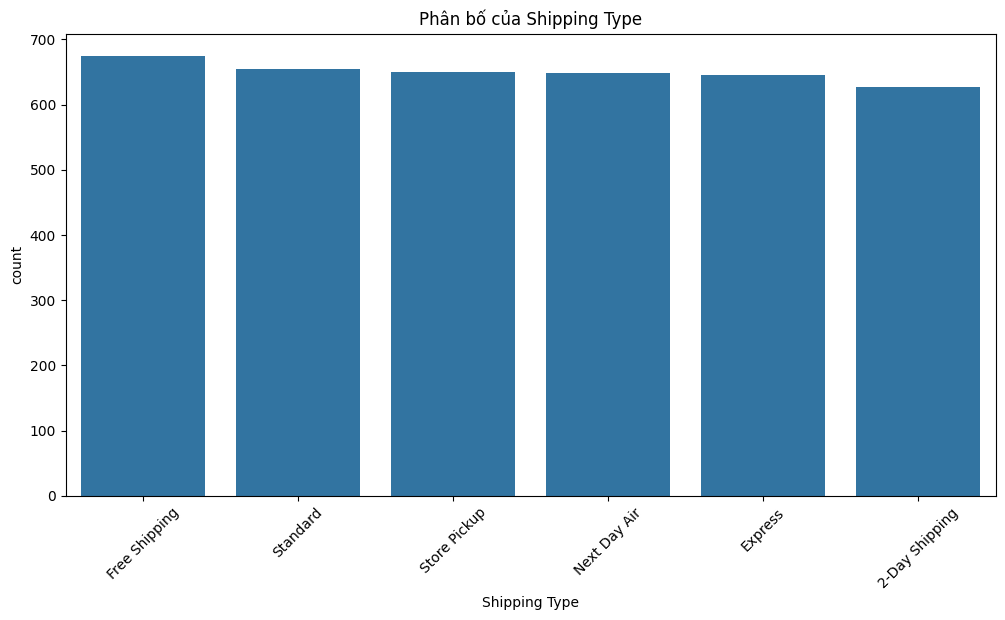

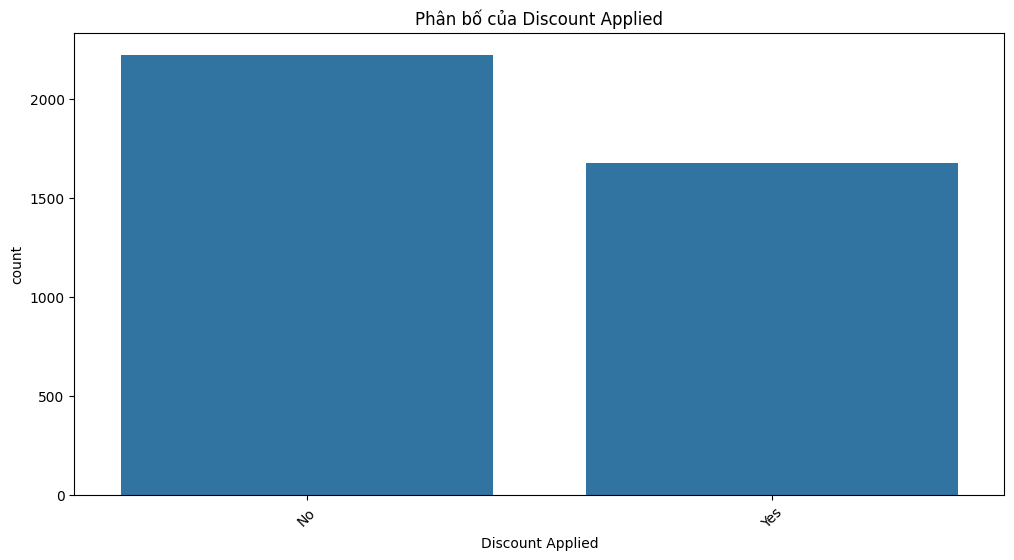

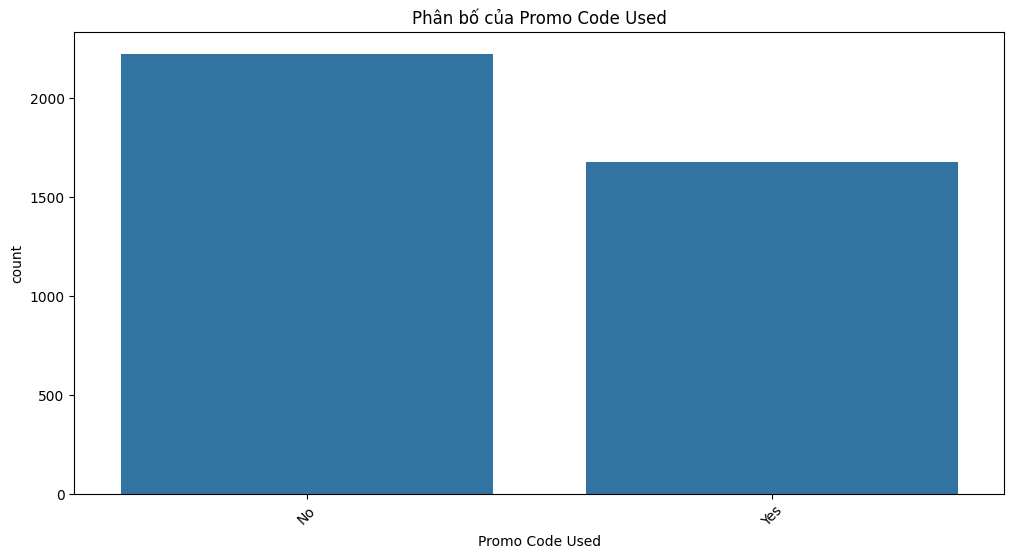

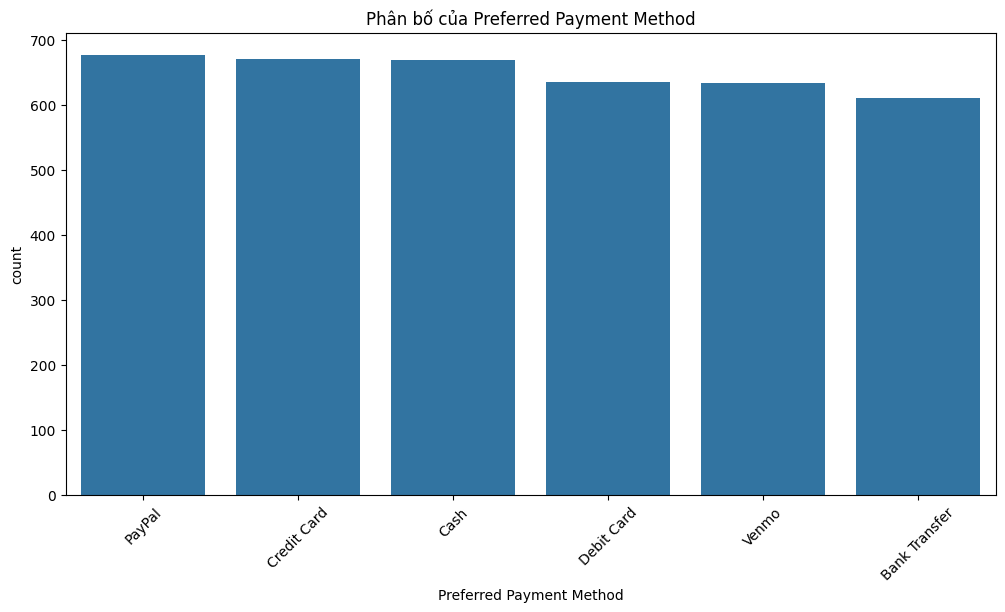

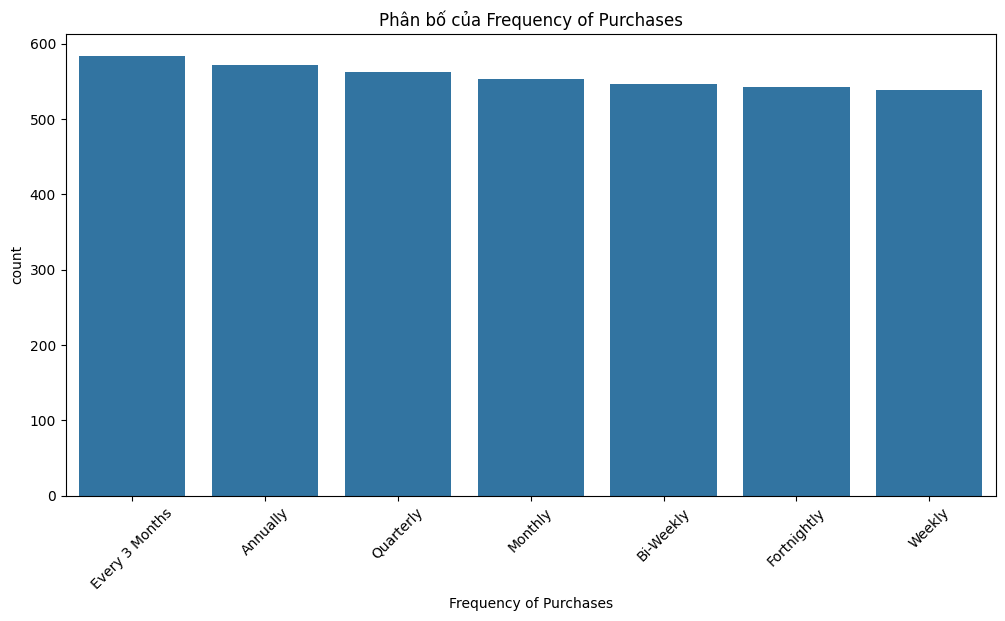

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tải dữ liệu
df_trends = pd.read_csv('shopping_trends.csv')
df_behavior = pd.read_csv('shopping_behavior_updated.csv')

# Hiển thị thông tin và thống kê cơ bản cho dataset shopping trends
print("Thông tin dữ liệu xu hướng mua sắm:")
print(df_trends.info())
print(df_trends.describe(include='all'))

# Hiển thị thông tin và thống kê cơ bản cho dataset hành vi mua sắm
print("Thông tin dữ liệu hành vi mua sắm:")
print(df_behavior.info())
print(df_behavior.describe(include='all'))

# Vẽ biểu đồ phân bố cho các thuộc tính số học trong dataset xu hướng mua sắm
numerical_features_trends = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

for feature in numerical_features_trends:
    plt.figure(figsize=(10, 5))
    sns.histplot(df_trends[feature], kde=True)
    plt.title(f'Phân bố của {feature}')
    plt.show()

# Vẽ biểu đồ phân bố cho các thuộc tính phân loại trong dataset xu hướng mua sắm
categorical_features_trends = ['Gender', 'Category', 'Size', 'Season', 'Subscription Status', 'Payment Method', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Preferred Payment Method', 'Frequency of Purchases']

for feature in categorical_features_trends:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df_trends, x=feature, order=df_trends[feature].value_counts().index)
    plt.title(f'Phân bố của {feature}')
    plt.xticks(rotation=45)
    plt.show()


# **2. Tiền xử lý dữ liệu**

> Bao gồm việc xử lý dữ liệu thiếu, chọn đặc trưng, phân chia dữ liệu, xử lý dữ liệu mất cân bằng



In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE

# Kết hợp các dataset để tiền xử lý (giả định chúng tương thích)
df = pd.concat([df_trends, df_behavior], ignore_index=True)

# Xử lý giá trị thiếu
df_numeric = df.select_dtypes(include=['number'])
df[df_numeric.columns] = df_numeric.fillna(df_numeric.median())

# Mã hóa nhãn cho các biến phân loại
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Chọn đặc trưng (giả định tất cả các đặc trưng đều quan trọng)
features = df.drop(columns=['Customer ID', 'Item Purchased'])
target = df['Item Purchased']

# Xử lý dữ liệu mất cân bằng sử dụng SMOTE
smote = SMOTE(random_state=42)
features_res, target_res = smote.fit_resample(features, target)

# Phân chia dữ liệu
X_train, X_temp, y_train, y_temp = train_test_split(features_res, target_res, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# **3. Mô hình áp dụng**

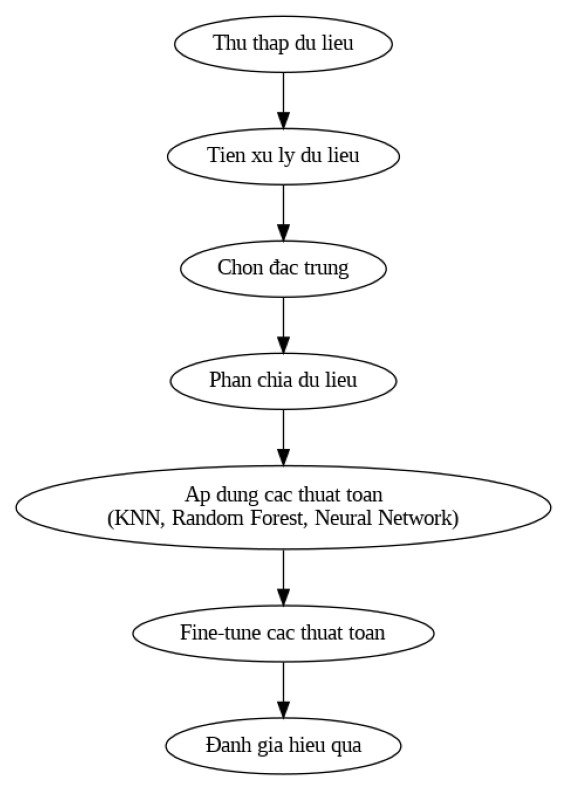

In [4]:
from graphviz import Digraph
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Tạo flowchart
dot = Digraph()

# Các bước trong mô hình
dot.node('A', 'Thu thap du lieu')
dot.node('B', 'Tien xu ly du lieu')
dot.node('C', 'Chon đac trung')
dot.node('D', 'Phan chia du lieu')
dot.node('E', 'Ap dung cac thuat toan\n(KNN, Random Forest, Neural Network)')
dot.node('F', 'Fine-tune cac thuat toan')
dot.node('G', 'Đanh gia hieu qua')

# Kết nối các bước
dot.edges(['AB', 'BC', 'CD', 'DE', 'EF', 'FG'])

# Lưu flowchart thành tệp hình ảnh
dot.render('flowchart', format='png')

# Hiển thị biểu đồ
img = mpimg.imread('flowchart.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

# **4. Tham số của các thuật toán**

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Khởi tạo mô hình KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
# Tham số KNN
print("Tham số KNN:")
print(knn.get_params())

# Khởi tạo mô hình Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Tham số Random Forest
print("Tham số Random Forest:")
print(rf.get_params())

# Tạo một mô hình mạng nơ-ron đơn giản
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Tham số Mạng nơ-ron
print("Tham số Mạng nơ-ron:")
model.summary()

Tham số KNN:
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Tham số Random Forest:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Tham số Mạng nơ-ron:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                   

# **5. Fine-tune cho các thuật toán**

> Dưới đây là mã để fine-tune các thuật toán sử dụng GridSearchCV cho KNN và Random Forest, và thay đổi cấu trúc mạng cho Neural Network.



In [6]:
from sklearn.model_selection import GridSearchCV

# Fine-tune KNN
knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)
print(f'Best KNN Params: {knn_grid.best_params_}')
print(f'Best KNN Score: {knn_grid.best_score_}')

# Fine-tune Random Forest
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)
print(f'Best Random Forest Params: {rf_grid.best_params_}')
print(f'Best Random Forest Score: {rf_grid.best_score_}')

# Fine-tune Neural Network (thay đổi cấu trúc mạng)
model_tuned = Sequential()
model_tuned.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model_tuned.add(Dense(64, activation='relu'))
model_tuned.add(Dense(32, activation='relu'))
model_tuned.add(Dense(1, activation='sigmoid'))

model_tuned.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_tuned.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_valid, y_valid))
nn_tuned_score = model_tuned.evaluate(X_valid, y_valid)[1]
print(f'Fine-tuned Neural Network Validation Accuracy: {nn_tuned_score}')


Best KNN Params: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best KNN Score: 0.6123642439431913
Best Random Forest Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest Score: 0.6832080200501254
Epoch 1/20
188/188 [==============================] - 2s 6ms/step - loss: -3861.9897 - accuracy: 0.0403 - val_loss: -23486.6797 - val_accuracy: 0.0413
Epoch 2/20
188/188 [==============================] - 1s 5ms/step - loss: -210347.4844 - accuracy: 0.0393 - val_loss: -614390.6875 - val_accuracy: 0.0413
Epoch 3/20
188/188 [==============================] - 1s 5ms/step - loss: -1841225.3750 - accuracy: 0.0393 - val_loss: -3718498.7500 - val_accuracy: 0.0413
Epoch 4/20
188/188 [==============================] - 1s 5ms/step - loss: -7432533.0000 - accuracy: 0.0393 - val_loss: -12272417.0000 - val_accuracy: 0.0413
Epoch 5/20
188/188 [==============================] - 1s 3ms/step - loss: -20327162.0000 - accuracy: 0.0393 - val_loss: -2990866

# **6. Sử dụng các độ đo để đánh giá hiệu quả của phương pháp**

KNN - Accuracy: 0.7264224473889321, Precision: 0.7313813761875364, Recall: 0.7264224473889321, F1: 0.7260388909535332
Random Forest - Accuracy: 0.7856586126266563, Precision: 0.7914703936925526, Recall: 0.7856586126266563, F1: 0.78542542977693
41/41 [==============================] - 0s 2ms/step
Neural Network - Accuracy: 0.042088854247856584, Precision: 0.0017714716518973154, Recall: 0.042088854247856584, F1: 0.003399847613140248
+----------------+------------+-------------+-----------+------------+
| Model          |   Accuracy |   Precision |    Recall |         F1 |
|----------------+------------+-------------+-----------+------------|
| KNN            |  0.726422  |  0.731381   | 0.726422  | 0.726039   |
| Random Forest  |  0.785659  |  0.79147    | 0.785659  | 0.785425   |
| Neural Network |  0.0420889 |  0.00177147 | 0.0420889 | 0.00339985 |
+----------------+------------+-------------+-----------+------------+


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


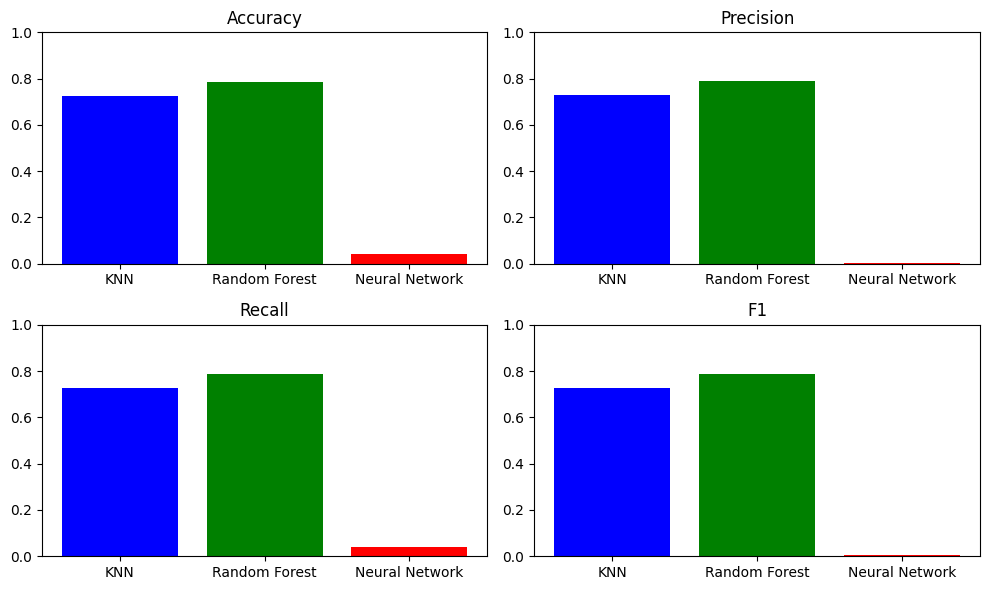

['neural_network_model.pkl']

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tabulate import tabulate
import joblib

# Đánh giá KNN
y_pred_knn = knn_grid.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn, average='weighted')
knn_recall = recall_score(y_test, y_pred_knn, average='weighted')
knn_f1 = f1_score(y_test, y_pred_knn, average='weighted')
print(f'KNN - Accuracy: {knn_accuracy}, Precision: {knn_precision}, Recall: {knn_recall}, F1: {knn_f1}')

# Đánh giá Random Forest
y_pred_rf = rf_grid.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='weighted')
rf_recall = recall_score(y_test, y_pred_rf, average='weighted')
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')
print(f'Random Forest - Accuracy: {rf_accuracy}, Precision: {rf_precision}, Recall: {rf_recall}, F1: {rf_f1}')

# Đánh giá Neural Network
y_pred_nn = (model_tuned.predict(X_test) > 0.5).astype(int)
nn_accuracy = accuracy_score(y_test, y_pred_nn)
nn_precision = precision_score(y_test, y_pred_nn, average='weighted')
nn_recall = recall_score(y_test, y_pred_nn, average='weighted')
nn_f1 = f1_score(y_test, y_pred_nn, average='weighted')
print(f'Neural Network - Accuracy: {nn_accuracy}, Precision: {nn_precision}, Recall: {nn_recall}, F1: {nn_f1}')

# Kết quả đánh giá
results = {
    "Model": ["KNN", "Random Forest", "Neural Network"],
    "Accuracy": [knn_accuracy, rf_accuracy, nn_accuracy],
    "Precision": [knn_precision, rf_precision, nn_precision],
    "Recall": [knn_recall, rf_recall, nn_recall],
    "F1": [knn_f1, rf_f1, nn_f1]}

# Hiển thị bảng kết quả đánh giá
df_results = pd.DataFrame(results)
table = tabulate(df_results, headers='keys', tablefmt='psql', showindex=False)
print(table)

# Vẽ biểu đồ cho các kết quả
plt.figure(figsize=(10, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)
    plt.bar(df_results["Model"], df_results[metric], color=['blue', 'green', 'red'])
    plt.title(metric)
    plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Lưu trữ các mô hình
joblib.dump(knn, 'knn_model.pkl')
joblib.dump(rf, 'random_forest_model.pkl')
joblib.dump(model, 'neural_network_model.pkl')

# **7. Kết quả thực nghiệm**

In [22]:
# Tải các mô hình
nn_model = joblib.load('neural_network_model.pkl')
knn_model = joblib.load('knn_model.pkl')
rf_model = joblib.load('random_forest_model.pkl')

# Dữ liệu mới
new_dt = pd.DataFrame({
 #   'Customer ID':[]
    'Age':[57],
    'Gender':[1],
    'Item Purchased':[10],
    'Category':[2],
    'Purchase Amount (USD)':[63],
    'Location':[19],
    'Size':[0],
    'Color':[11],
    'Season':[3],
    'Review Rating':[3.3],
    'Subscription Status':[1],
    'Payment Method':[3],
    'Shipping Type':[3],
    'Discount Applied':[1],
    'Promo Code Used':[1],
    'Previous Purchases':[19],
    'Preferred Payment Method':[3],
    'Frequency of Purchases':[4]})

# Chuẩn hóa dữ liệu mới
new_data_scaled = scaler.transform(new_data)

# Mã hóa nhãn cho các biến phân loại
label_encoders = {}
for column in new_dt.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    new_dt[column] = le.fit_transform(new_dt[column])
    label_encoders[column] = le

# Dự đoán với mô hình KNN
knn_predictions = knn_model.predict(new_data_scaled)
print("KNN Predictions:", knn_predictions)

# Dự đoán với mô hình Random Forest
rf_predictions = rf_model.predict(new_data_scaled)
print("Random Forest Predictions:", rf_predictions)

# Dự đoán với mô hình Neural Network
#nn_predictions = nn_model.predict(new_data_scaled)
#print("Neural Network Predictions:", nn_predictions)

# Hiển thị nhãn dự đoán
predicted_label = knn_predictions[0]
print(f"The predicted item purchased is: {predicted_label}")
predicted_label = rf_predictions[0]
print(f"The predicted item purchased is: {predicted_label}")

KNN Predictions: [4]
Random Forest Predictions: [20]
The predicted item purchased is: 4
The predicted item purchased is: 20
